In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from array import *
import statistics

In [2]:
df = pd.read_csv("/home/theubuntu/ZedRos_CustomDetection/YoloV5 ResultsonTest/Retrieve+Ingest+Message+Publish/timesForDetection.txt", sep=",",header=None)
df = df.iloc[: , :-1]
df.head()

,0,1,2,3,4,5,6,7,8
0,16.784384,2.513908,0.352524,2.172751,0.023468,2.981377,0.011247,24.840192,1.665612e+12
1,16.582912,2.778729,0.343839,2.178945,0.023744,2.924226,0.011478,24.844288,1.665612e+12
2,16.440320,2.864299,0.349820,2.165858,0.023363,2.992916,0.011530,24.848640,1.665612e+12
3,16.477696,2.770877,0.356154,2.257214,0.023632,3.012397,0.011379,24.909824,1.665612e+12
4,16.386304,2.816200,0.376655,2.167007,0.022577,2.921642,0.010049,24.700928,1.665612e+12


In [3]:
numberOfColumns=df.shape[1]
numberOfRows =df.shape[0]

In [4]:
Max_time=[0 for i in range(numberOfColumns)] 
Min_time=[0 for i in range(numberOfColumns)] 
Mean_time=[0 for i in range(numberOfColumns)] 
Times=["The time it took since the image first got it’s timestamp to before retrieving it in the zed-ros-wrapper",
"The time it took to retrieve the image from the ZED-SDK",
"The time it took the image to be converted to the right format for the YOLOv5-TensorRT library",
"The time it took for the YOLOv5-TensorRT library to detect the objects in the given image",
"The time it took to ingest the 2D detections  into the ZED-SDK",
"The time it took to retrieve the detected objects with the 3D positions from the ZED-SDK",
"The time it took to create and publish the messages with the detected objects to the ros topic", 
"The total time from the moment from when the image got its timestamp to publishing the ros messages with the detected objects"]

In [5]:
for i in range(0, numberOfColumns):
    Max_time[i] = df[df.columns[i]].max()
    Mean_time[i]= df[df.columns[i]].mean()
    Min_time[i]= df[df.columns[i]].min()

In [6]:
Times[0]

'The time it took since the image first got it’s timestamp to before retrieving it in the zed-ros-wrapper'

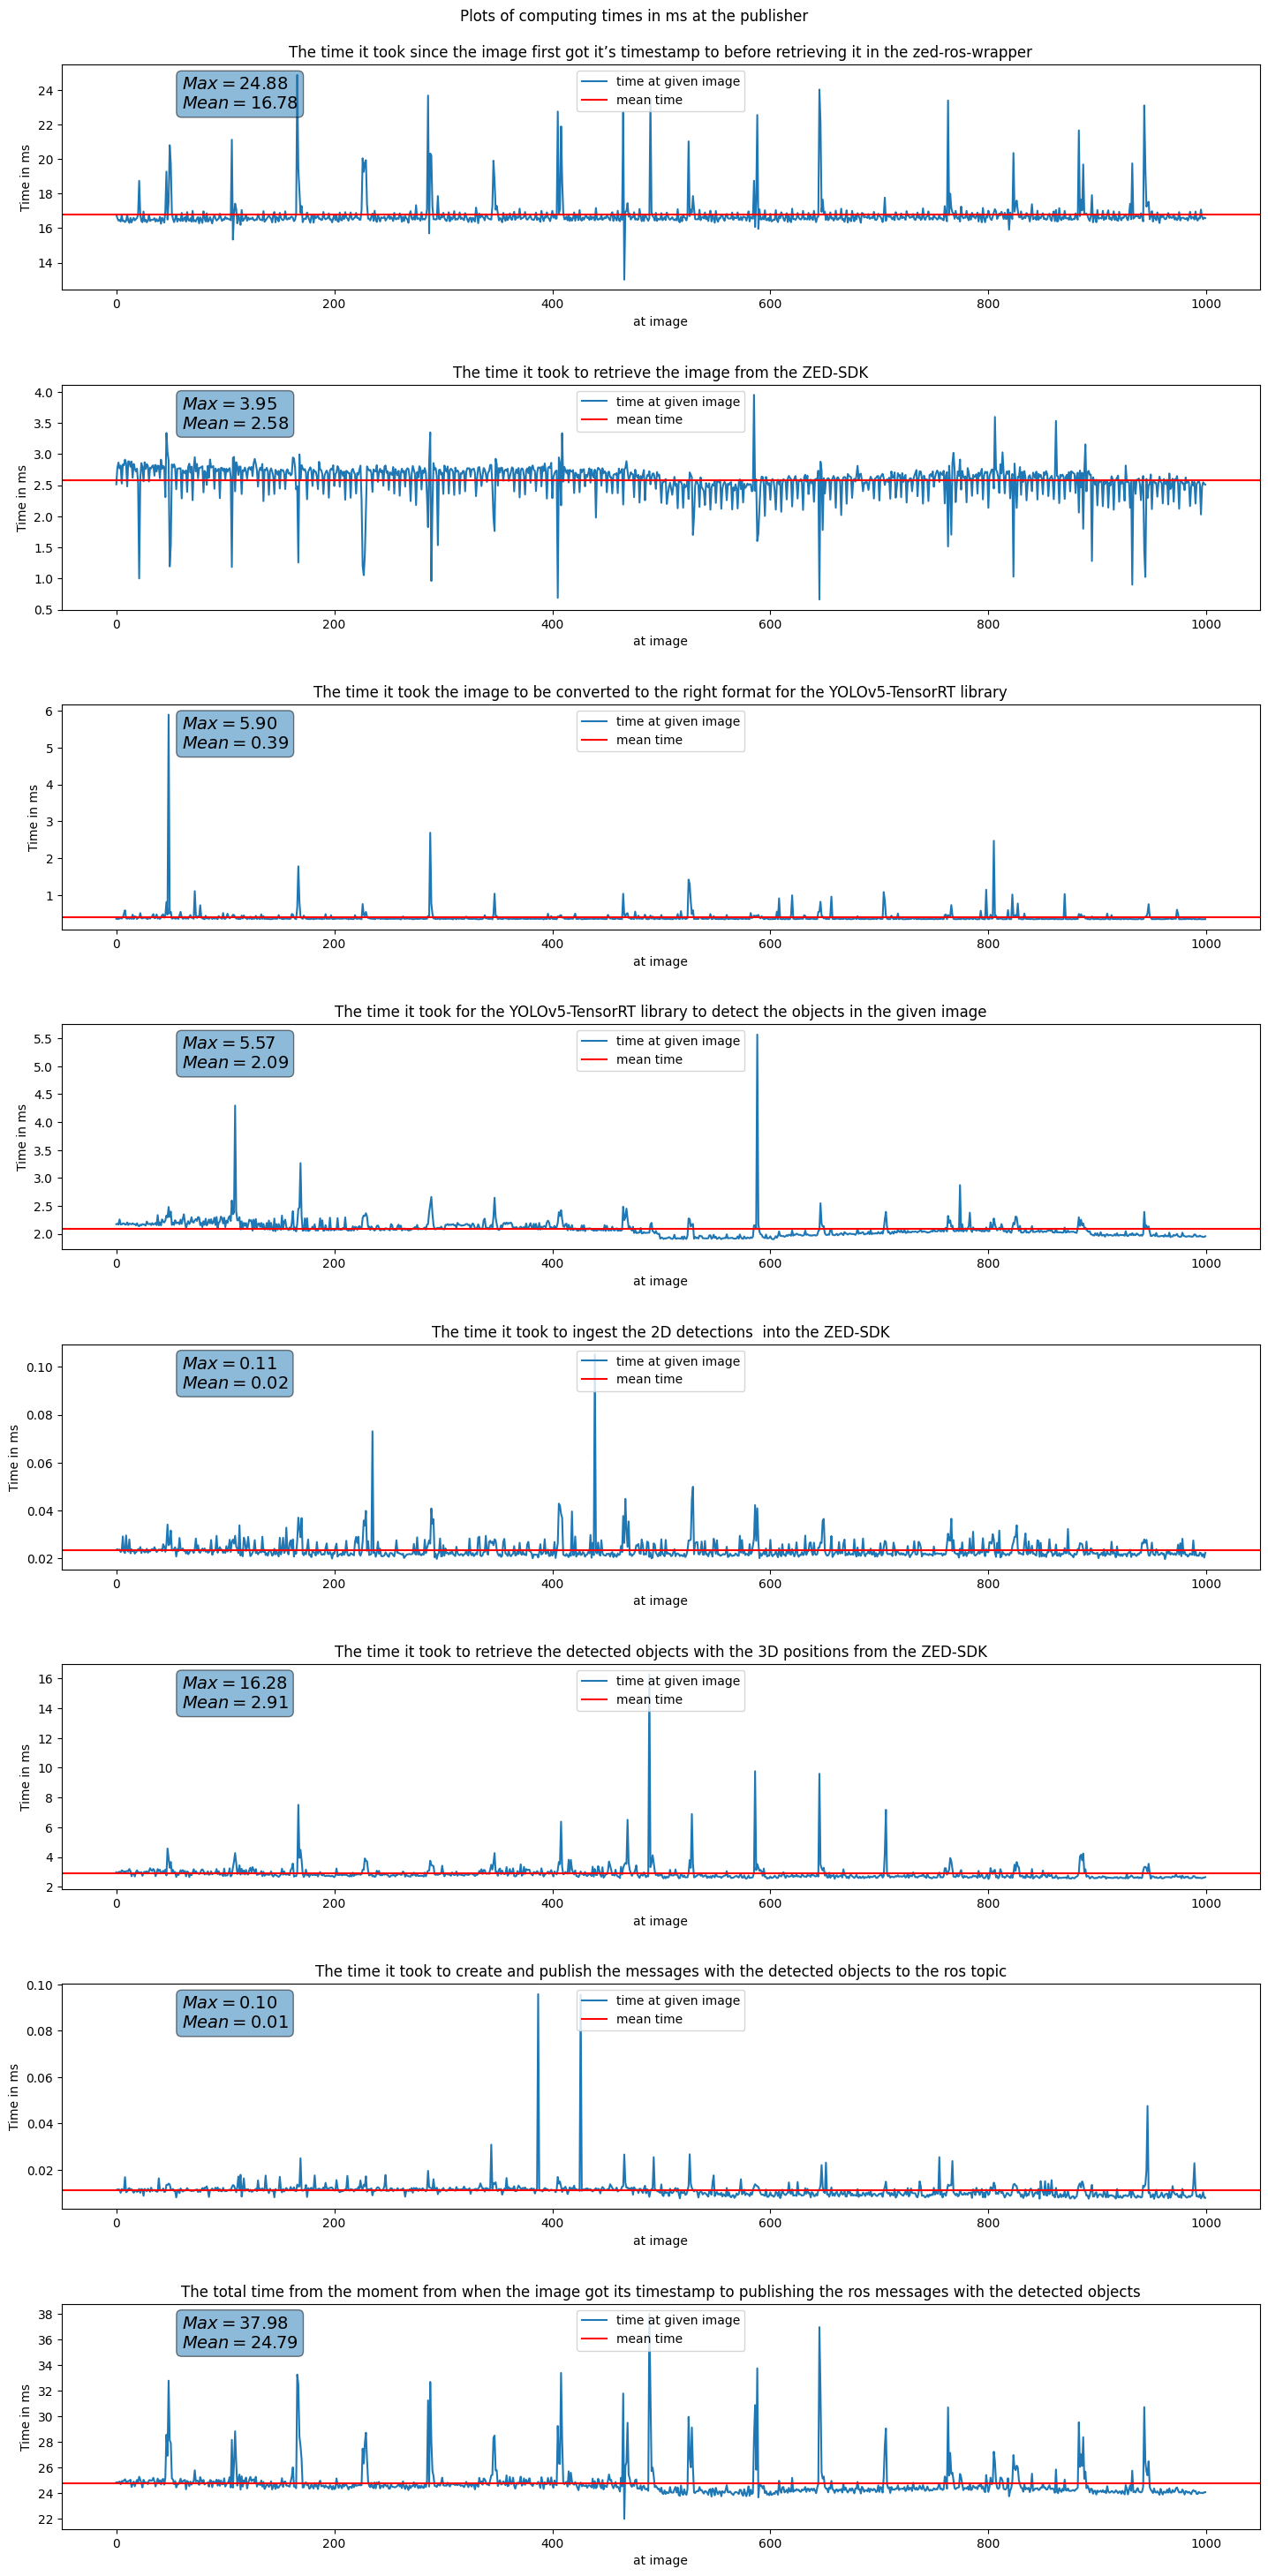

In [7]:
fig, axs = plt.subplots(df.shape[1]-1)
fig.suptitle('Plots of computing times in ms at the publisher')
for i in range(0, numberOfColumns-1):

    axs[i].set_title(Times[i])
    axs[i].plot(df[df.columns[i]],label='time at given image')
    axs[i].axhline(y = Mean_time[i],label='mean time', color = 'r', linestyle = '-')
    text = '\n'.join((
    "$Max=%.2f$" %(Max_time[i], ),
   #"$Min=%.2f$" %(Min_time[i], ),
    "$Mean=%.2f$" %(Mean_time[i], )))
    props = dict(boxstyle='round', alpha=0.5)
    axs[i].text(0.1, 0.95, text, transform=axs[i].transAxes, fontsize=14,
    verticalalignment='top', bbox=props)
    axs[i].set_xlabel('at image')
    axs[i].set_ylabel('Time in ms')
    axs[i].legend(loc='upper center')
    
fig.set_size_inches(15, 30) 
fig.tight_layout(pad=3.0)
 

In [8]:
fig.savefig('/home/theubuntu/ZedRos_CustomDetection/YoloV5 ResultsonTest/Retrieve+Ingest+Message+Publish/fp16/latencies.png')

In [9]:
df_sub= pd.read_csv("/home/theubuntu/ZedRos_CustomDetection/YoloV5 ResultsonTest/Retrieve+Ingest+Message+Publish/fp16/timesForDetectionSub.txt", sep=",",header=None)
df_sub = df_sub.iloc[: , :-1]
df_sub.head()


,0,1
0,43.956543,1.665069e+12
1,32.526611,1.665069e+12
2,32.467773,1.665069e+12
3,57.960938,1.665069e+12
4,41.142578,1.665069e+12


In [10]:
numberOfColumns_sub=df_sub.shape[1]
numberOfRows_sub =df_sub.shape[0]
numberOfColumns_sub

2

In [11]:
Max_time_sub=[0 for i in range(numberOfColumns_sub)] 
Min_time_sub=[0 for i in range(numberOfColumns_sub)] 
Mean_time_sub=[0 for i in range(numberOfColumns_sub)] 
Times_sub=["The time it took from the first timestamp of the image to retrieve all detected objects from the same image","Times"]
for i in range(0, numberOfColumns_sub):
    Max_time_sub[i] = df_sub[df_sub.columns[i]].max()
    Min_time_sub[i]=  df_sub[df_sub.columns[i]].min()
    Mean_time_sub[i]= df_sub[df_sub.columns[i]].mean()

    

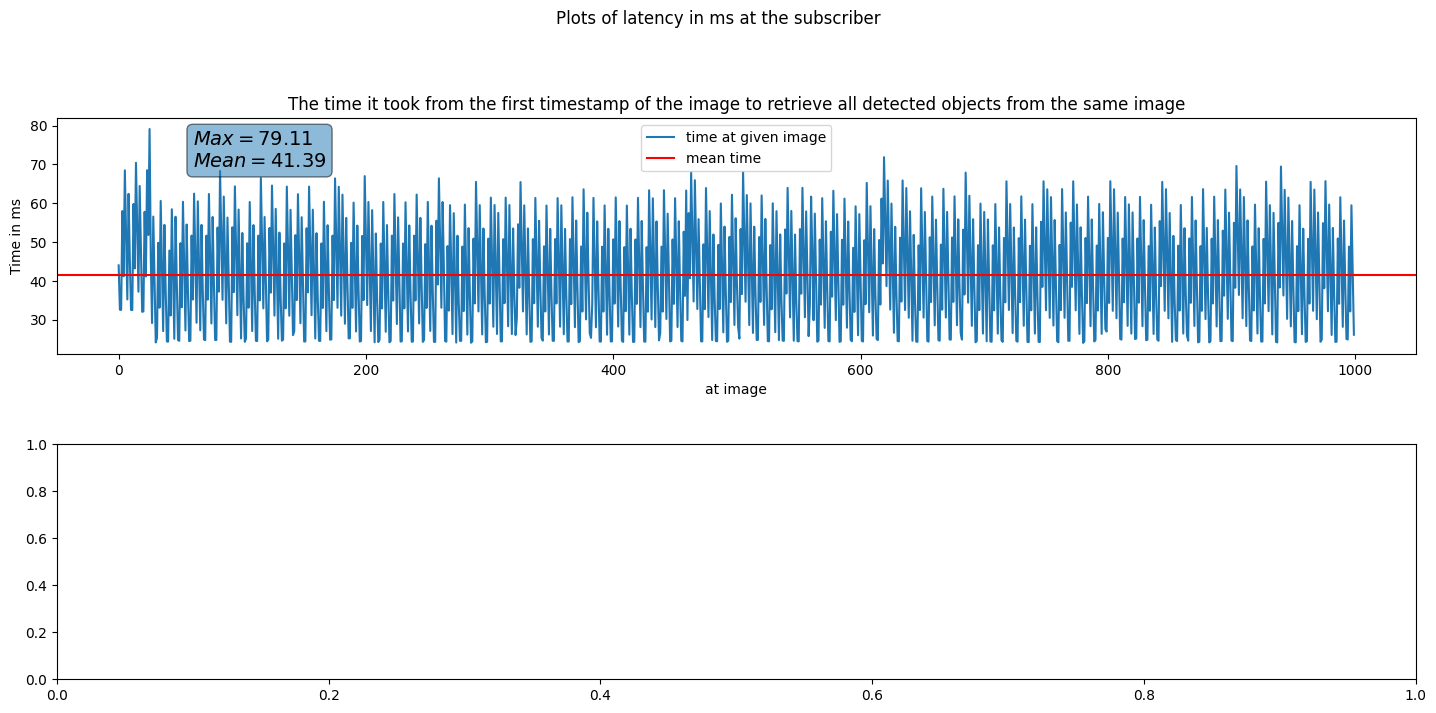

In [12]:
fig, axs = plt.subplots(df_sub.shape[1])
fig.suptitle('Plots of latency in ms at the subscriber')
for i in range(0, 1):

    axs[i].set_title(Times_sub[i])
    axs[i].plot(df_sub[df_sub.columns[i]],label='time at given image')
    axs[i].axhline(y = Mean_time_sub[i],label='mean time', color = 'r', linestyle = '-')
    text = '\n'.join((
    "$Max=%.2f$" %(Max_time_sub[i], ),
   #"$Min=%.2f$" %(Min_time[i], ),
    "$Mean=%.2f$" %(Mean_time_sub[i], )))
    props = dict(boxstyle='round', alpha=0.5)
    axs[i].text(0.1, 0.95, text, transform=axs[i].transAxes, fontsize=14,
    verticalalignment='top', bbox=props)
    axs[i].set_xlabel('at image')
    axs[i].set_ylabel('Time in ms')
    axs[i].legend(loc='upper center')
    
fig.set_size_inches(15, 7.5) 
fig.tight_layout(pad=3.0)
 

In [13]:
fig.savefig('/home/theubuntu/ZedRos_CustomDetection/YoloV5 ResultsonTest/Retrieve+Ingest+Message+Publish/fp16/latencies_sub.png')

In [14]:
#Measurements of Fps


In [15]:
df[df.columns[numberOfColumns-1]][0]

1665612253481.3577

In [16]:
fps=[0]
idx_fps=0
start_time = df[df.columns[numberOfColumns-1]][0]
sec_in_milli=1e3
stop = start_time +sec_in_milli

for i in range (0,numberOfRows):
    time =df[df.columns[numberOfColumns-1]][i]
    
    if(time<start_time+sec_in_milli):
        fps[idx_fps]=fps[idx_fps]+1
    else: 
        fps.append(1)
        idx_fps=idx_fps+1
        start_time=time
        
fps.pop()#since the last second isnt a "full second"

34

In [17]:
fps

[60, 60, 61, 61, 61, 59, 61, 61, 61, 61, 60, 59, 61, 60, 60, 60]

In [18]:
fps_sub=[0]
idx_fps=0
start_time = df_sub[df_sub.columns[numberOfColumns_sub-1]][0]

sec_in_milli=1e3
stop = start_time +sec_in_milli

start_time


1665068830439.2827

In [19]:
for i in range (0,numberOfRows_sub):
    time =df_sub[df_sub.columns[numberOfColumns_sub-1]][i]
    
    if(time<start_time+sec_in_milli):
        fps_sub[idx_fps]=fps_sub[idx_fps]+1
    else: 
        fps_sub.append(1)
        idx_fps=idx_fps+1
        start_time=time
        
fps_sub.pop()#since the last second isnt a "full secons"

27

In [20]:
fps_sub

[59, 62, 60, 60, 60, 63, 59, 61, 60, 61, 62, 61, 62, 60, 60, 63]

In [21]:
Mean_fps= statistics.mean(fps)
Min_fps= statistics.mean(fps)
Mean_fps_sub= statistics.mean(fps_sub)
Min_fps_sub= statistics.mean(fps_sub)

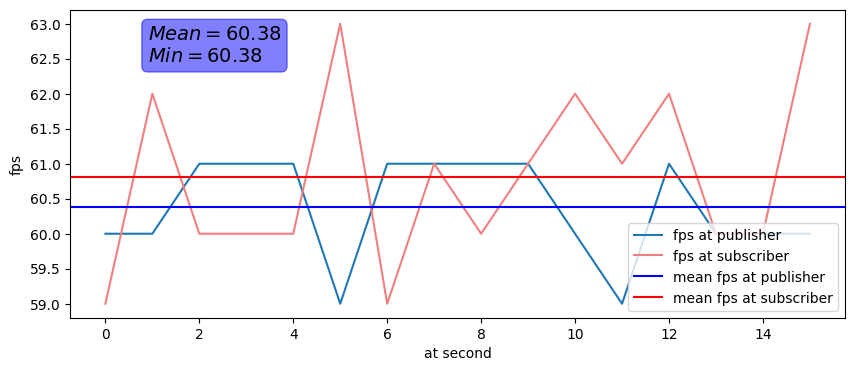

In [22]:




fig, ax = plt.subplots(figsize=(10, 4))
text2 = '\n'.join((
    "$Mean=%.2f$" %(Mean_fps, ),
    "$Min=%.2f$" %(Min_fps, )))
props = dict(boxstyle='round', alpha=0.5,color='b')
ax.text(0.1, 0.95, text2, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
ax.plot(fps,label="fps at publisher")
ax.plot(fps_sub, "lightcoral", label="fps at subscriber")
ax.axhline(y = Mean_fps, color = 'b', linestyle = '-', label="mean fps at publisher")
ax.axhline(y = Mean_fps_sub, color = 'red', linestyle = '-',label="mean fps at subscriber")
ax.set_xlabel("at second")
ax.set_ylabel("fps")
ax.legend(loc='lower right')
plt.show()


In [23]:
fig.savefig('/home/theubuntu/ZedRos_CustomDetection/YoloV5 ResultsonTest/Retrieve+Ingest+Message+Publish/fp16/fps.png')